In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import warnings

## Метод Эйлера (Euler) и метод Эйлера с пересчетом (modifiedEuler)

In [2]:
# численный метод подсчета интеграла для y` = f(x,y):
def Euler(x_0=None, y_0=None, h=0.1, N=100, f=None):
    x_points = [x_0 + i*h for i in range(N + 1)]
    y_points = []

    y_cur = y_0
    y_points.append(y_0)
    for i in range(N):
        x_cur = x_points[i]
        f_cur = f(x_cur, y_cur)
        y_upd = y_cur + h * f_cur
        y_cur = y_upd
        y_points.append(y_upd)

    return x_points, y_points


def modifiedEuler(x_0=None, y_0=None, h=0.1, N=100, f=None):
    # Метод Эйлера с пересчетом     
    x_points = [x_0 + i*h for i in range(N + 2)]
    y_points = []

    y_cur = y_0
    y_points.append(y_0)
    for i in range(N):
        x_cur = x_points[i]
        f_cur = f(x_cur, y_cur)
        y_upd = y_cur + h * f_cur
        f_next = f(x_points[i+1], y_upd)
        y_all = y_cur + h * (f_cur + f_next) / 2
        y_cur = y_all
        y_points.append(y_all)

    return x_points[:-1], y_points

**1)**  
Чтобы проверить результат работы алгоритма, попробуем численно приблизить решение диф. уравнения : 
$$y' + 2xy = xe^{-x^2},$$
$$f(x, y) = -2xy + xe^{-x^2}, $$
$$y(0)=4$$
Аналитически можно вывести решение: 
$$y = (\frac{x^2}{2} + 4)e^{-x^2}$$
Теперь проверим, насколько наш метод Эйлера приближает реальные значения в точках. Рассмотрим вариант с шагом $h=0.1$ и количеством итераций равным $N=100$

In [3]:
def draw_plot(x_vals, y_vals, real_vals, title, label):
    fig = plt.figure(figsize=(7,4))
    plt.title(title, fontsize=12)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.grid(True)
    plt.plot(x_vals, y_vals, label=label)
    plt.plot(x_vals, real_vals, label='Настоящие значения')
    plt.legend(loc=1)
    plt.show()

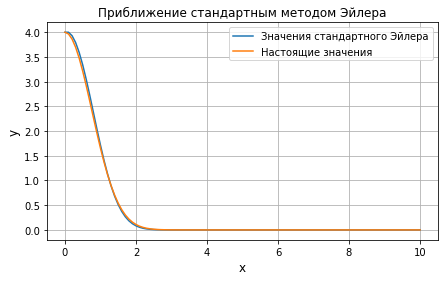

MSE metric: 0.105403685662


In [4]:
def f1(x, y):
    return -2*x*y + x*np.exp(-x**2)

def real_f1(x):
    return (x**2/2 + 4) * np.exp(-x**2)

x_vals, y_vals = Euler(x_0=0, y_0=4, h=0.1, N=100, f=f1)
real_vals = [real_f1(x) for x in x_vals]

draw_plot(x_vals, y_vals, real_vals, 'Приближение стандартным методом Эйлера', 'Значения стандартного Эйлера')

print('MSE metric:', ((np.array(y_vals) - np.array(real_vals))**2).sum())

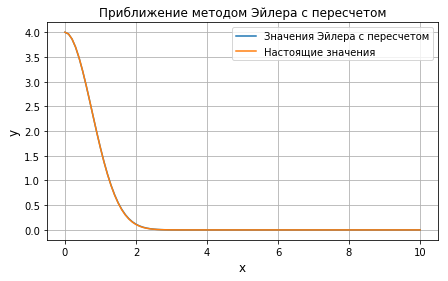

MSE metric: 0.000500672691137


In [5]:
x_vals, y_vals = modifiedEuler(x_0=0, y_0=4, h=0.1, N=100, f=f1)
real_vals = [real_f1(x) for x in x_vals]

draw_plot(x_vals, y_vals, real_vals, 'Приближение методом Эйлера с пересчетом', 'Значения Эйлера с пересчетом')
print('MSE metric:', ((np.array(y_vals) - np.array(real_vals))**2).sum())

Насколько мы можем видеть, и стандартный метод Эйлера и метод Эйлера хорошо приближает настоящий ответ. Но все же, метод Эйлера с пересчетом приближает решение намного лучше, это видно и на графике (кривые в модифицированном методе чуть ли не наложились друг на друга, в отличии от стандартного метода) и на значении MSE-метрики 0.0005006726911372757 против 0.10540368566206951 (разница ~200 раз). Это согласуется и с теорией, ведь в модифицированном методе мы сначала делаем грубое приближение, а потом корректируем его: 
$$
(modified):
y_{i+1} = y_i + \frac{f(x_i, y_i) + f(x_{i+1}, y_i + f(x_i, y_i) \Delta{x}))}{2} \Delta{x} x
$$
В отличии от стандартного метода:
$$
(standart):
y_{i+1} = y_i + f(x_i, y_i) \Delta(x)
$$


__2)__ 
Аналогично проверим алгоритм на диф. уравнении:
$$y' = \frac{1}{cos(x)} - y \cdot tg(x),$$
$$y(0) = 3$$

Аналитическим решением будет являться функция:
$$y = 3 cos(x) + sin(x)$$

Рассмотрим поведение алгоритма при шаге $h=0.00001$ и $N=1000000$

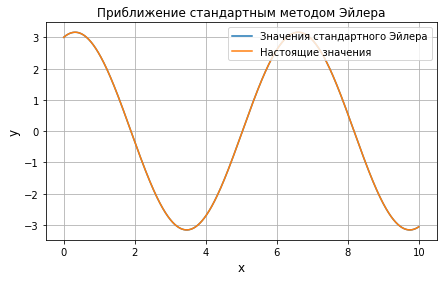

MSE metric: 0.0022264696649


In [6]:
def f2(x, y):
    return (1.0/np.cos(x)) - y * np.tan(x) 

def real_f2(x):
    return 3*np.cos(x) + np.sin(x)

x_vals, y_vals = Euler(0,3,0.00001,1000000,f2)
real_vals = [real_f2(x) for x in x_vals]

draw_plot(x_vals, y_vals, real_vals, 'Приближение стандартным методом Эйлера', 'Значения стандартного Эйлера')

print('MSE metric:', ((np.array(y_vals) - np.array(real_vals))**2).sum())

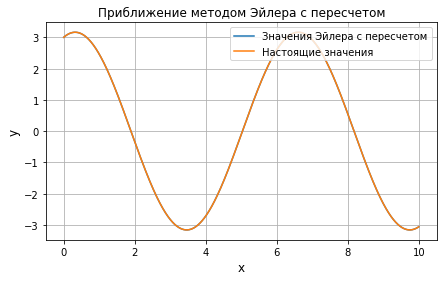

MSE metric: 0.0311686762049


In [7]:
x_vals, y_vals = modifiedEuler(0,3,0.00001,1000000,f2)
real_vals = [real_f2(x) for x in x_vals]

draw_plot(x_vals, y_vals, real_vals, 'Приближение методом Эйлера с пересчетом', 'Значения Эйлера с пересчетом')

print('MSE metric:', ((np.array(y_vals) - np.array(real_vals))**2).sum())

Метод Эйлера отлично показывает себя и на этом примере, об этом говорит полное совпадение истинных значений и предсказанных на графике, а также и сама метрика mse, принимает значения < 0.1 в каждом из случаев

## Формулы дифференцирования назад (ФДН-метод с явной формулой)

Задача состоит в том, чтобы по значениям сеточной функции $(x_{n-k+1}, y_{n-k+1}), ..., (x_n, y_n)$ построить интерполяционный многочлен $q(x)$, для которого будет требоваться, чтобы хоть в одной точке его производная  совпала с правой частью диф. уравнения: $q'(x_{n+1-r}) = f(x_{n+1-r}, y_{n+1-r})$

In [8]:
def draw_plot_2(start_x, start_y, x_vals, y_vals, real_vals, n, title, label):
    plt.figure(figsize=(7, 4))
    plt.scatter(start_x, start_y, label='Исходные точки на сетке')
    plt.plot(x_vals, y_vals, label=label, color='orange')
    plt.scatter(x_vals[-n:], real_vals[-n:], label='Настоящие значения', color='green')
    plt.grid(True)
    plt.title(title, fontsize=12)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.legend(loc=1)
    plt.show()

In [9]:
def backDifferential(x_0=None, y_0=None, h=0.1, N=100, f=None, k=None, r=None):
    y_points = y_0.copy()
    x_points = x_0.copy()
    if r == 1:
        if k == 1:
            for i in range(N+1):
                y_points.append(y_points[-1] + h * f(x_points[-1], y_points[-1]))
                x_points.append(x_points[-1] + h)
        elif k == 2:
            for i in range(N+1):
                y_points.append(y_points[-2] + 2*h*f(x_points[-1], y_points[-1]))
                x_points.append(x_points[-1] + h)
        elif k == 3:
            warnings.warn("При k=3, схема неустойчива!", UserWarning)
            for i in range(N+1):
                y_points.append(3 * (h * f(x_points[-1], y_points[-1]) - 
                                    (1/2) * y_points[-1] + y_points[-2] - (1/6) * y_points[-3]))
                x_points.append(x_points[-1] + h)
    elif r == 0:
        warnings.warn("Функция в данном случае задана неявно!", UserWarning)
        pass
    return x_points, y_points

Испробуем наш метод для первой задачи: $f(x, y) = -2xy + xe^{-x^2}, $ $y(0)=4$. Испробуем различные варианты построения интерполяционного многочлена (k=1, 2, 3). Для этого для начала построим нашу сеточную функцию (допустим из 30 значений)

In [10]:
start_x = list(np.arange(0, 30) / 10)
start_y = [real_f1(x) for x in start_x]
n = 100

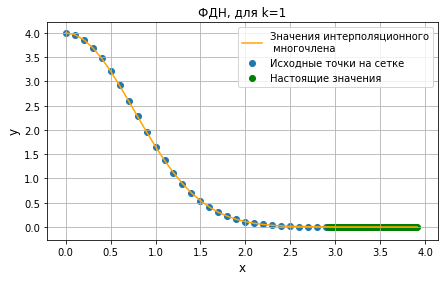

In [11]:
x_vals, y_vals = backDifferential(x_0=start_x, y_0=start_y, h=0.01, N=n, f=f1, k=1, r=1)
real_vals = [real_f1(x) for x in x_vals]
draw_plot_2(start_x, start_y, x_vals, y_vals, real_vals, n, 'ФДН, для k=1', 'Значения интерполяционного\n многочлена')

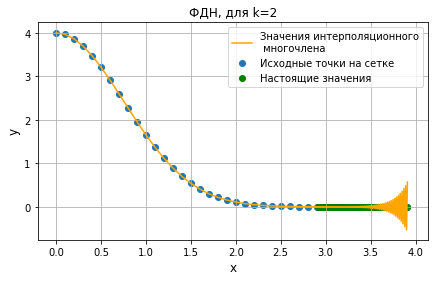

In [12]:
x_vals, y_vals = backDifferential(x_0=start_x, y_0=start_y, h=0.01, N=n, f=f1, k=2, r=1)
real_vals = [real_f1(x) for x in x_vals]
draw_plot_2(start_x, start_y, x_vals, y_vals, real_vals, n, 'ФДН, для k=2', 'Значения интерполяционного\n многочлена')

/Users/beatrisa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: При k=3, схема неустойчива!
  


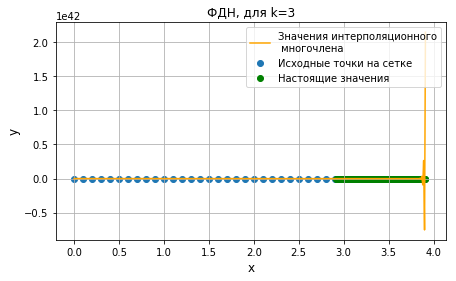

In [13]:
x_vals, y_vals = backDifferential(x_0=start_x, y_0=start_y, h=0.01, N=n, f=f1, k=3, r=1)
real_vals = [real_f1(x) for x in x_vals]
draw_plot_2(start_x, start_y, x_vals, y_vals, real_vals, n, 'ФДН, для k=3', 'Значения интерполяционного\n многочлена')

Как видим из результатов визуализации, интерполляционный многочлен для k=1 и k=2 выходит неплохим. Для k=1 он очень точный, и явно проходит через точки, находящиеся на настоящей функции. Для k=2, он тоже проходит рядом с ними, но уже накапливает больше отклонений в себе и начинает понемногу расходиться. При k=3, мы получаем ужасный результат, это еще раз подтверждает неустойчивость схемы при k=3, и говорит о том. что на практических задачах схему с таким значением параметра использовать нельзя!